In [1]:
import data_generation_functions as dgf
import learning_algorithms_functions as laf
import classical_methods_functions as cmf
import simulation_functions as sf
import visualization_functions as vf
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import pickle #it is used for importing/exporting variables
def save_obj(obj, name ):
    #Saves the existing variable in the workspace
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    #Loads a variable (already saved) from folder 'obj'
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
    
def intersect_intervals(a,b,epsilon):
    x=max(a[0],b[0])
    y=min(a[1],b[1])
    return (x-epsilon,y+epsilon)

def find_threshold_interval(D,i):
    '''
    D: Decisions
    i: relative rank
    
    Returns:
    a,b: accept if the relative rank is i and after a items observed and before b+1 items observed
    '''
    i-=1
    a=i
    if_alpha_found=False
    for d in D:
        #print(not d[i])
        if len(d)>i:
            if not if_alpha_found:
                if not d[i]:
                    a+=1
                else:
                    if_alpha_found=True
                    b=a
            else:
                if d[i]:
                    b+=1
    return a,b


exp_utility=load_obj('exp_utility')


In [2]:
N=10
k=5
U=cmf.create_payoff_array(N,0,0)
#print(U)
D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
print(E[0][0])
#vf.plot_decision_graph(D,if_latex=True)

0.3986904761904762


In [3]:


cmf.find_expected_nr_of_observed_candidates(N,D)/N

0.7410427787126431

In [66]:
rou=4
Ns=[10,20,50,100,1000,10000]
#Ns=[10,11,12,13]
#print tables
if False:
    #Classic
    for N in Ns:
        U=cmf.create_payoff_array(N,0,0)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        pr=np.round(E[0][0],rou)
        ex=np.round(cmf.find_expected_nr_of_observed_candidates(N,D)/N,rou)
        a,b=find_threshold_interval(D,1)
        a_1='({}, {})'.format(np.round((a-1)/N,rou),np.round((a+1)/N,rou))
        print('{} & {} & {} & {}'.format(N,pr,ex,a_1))
else:
    #3rd Best
    for N in Ns:
        U=cmf.create_payoff_array(N,2,3)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        pr=np.round(E[0][0],rou)
        ex=np.round(cmf.find_expected_nr_of_observed_candidates(N,D)/N,rou)
        a,b=find_threshold_interval(D,1)
        a_1='({}, {})'.format(np.round((a-1)/N,rou),np.round((a+1)/N,rou))
        a,b=find_threshold_interval(D,2)
        a_2='({}, {})'.format(np.round((a-1)/N,rou),np.round((a+1)/N,rou))
        a,b=find_threshold_interval(D,3)
        a_3='({}, {})'.format(np.round((a-1)/N,rou),np.round((a+1)/N,rou))
        print('{} & {} & {} & {} & {}'.format(N,pr,ex,a_2,a_3))
    

10 & 0.2709 & 0.7578 & (0.3, 0.5) & (0.5, 0.7)
20 & 0.2503 & 0.7754 & (0.4, 0.5) & (0.55, 0.65)
50 & 0.239 & 0.7723 & (0.44, 0.48) & (0.58, 0.62)
100 & 0.2355 & 0.7723 & (0.45, 0.47) & (0.6, 0.62)
1000 & 0.2325 & 0.7726 & (0.465, 0.467) & (0.606, 0.608)
10000 & 0.2322 & 0.7725 & (0.4663, 0.4665) & (0.6064, 0.6066)


In [4]:
alphas,betas

NameError: name 'alphas' is not defined

In [ ]:
alphas,betas

In [5]:
#vanderbei test
for N in [2,3,4,5,6,7,8,9,10,19,20]:
    k_0=np.floor(N/2)
    print(N,k_0,k_0*(N-k_0)/N/(N-1),(N/2/(4*N/2-2)))

2 1.0 0.5 0.5
3 1.0 0.3333333333333333 0.375
4 2.0 0.3333333333333333 0.3333333333333333
5 2.0 0.3 0.3125
6 3.0 0.3 0.3
7 3.0 0.2857142857142857 0.2916666666666667
8 4.0 0.2857142857142857 0.2857142857142857
9 4.0 0.2777777777777778 0.28125
10 5.0 0.2777777777777778 0.2777777777777778
19 9.0 0.2631578947368421 0.2638888888888889
20 10.0 0.2631578947368421 0.2631578947368421


In [ ]:
def plot_figures(figure_id=1,N=10):
    if figure_id==1:
        #standarad problem solution
        U=cmf.create_payoff_array(N,0,7)
        print(U)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        print(E[0])
        vf.plot_decision_graph(D,if_latex=True)
    if figure_id==2:
        #2nd best solution
        U=cmf.create_payoff_array(N,2,2)
        print(U)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        print(E[0])
        vf.plot_decision_graph(D,if_latex=True)
    if figure_id==3:
        #Vanderbei's 2nd best solution
        U=cmf.create_payoff_array(N,2,2)
        print(U)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        D[-2][0]=False
        print(E[0])
        D,E,dyn_hiring_rule=cmf.evaluate_the_strategy(N,U,D)
        vf.plot_decision_graph(D,if_latex=True)
    if figure_id==4:
        #3rd best
        U=cmf.create_payoff_array(N,2,3)
        print(U)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        D,E,dyn_hiring_rule=cmf.evaluate_the_strategy(N,U,D)
        vf.plot_decision_graph(D,if_latex=True)    
    if figure_id==5:
        #4th best
        U=cmf.create_payoff_array(N,2,4)
        print(U)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        print(E[0])
        D,E,dyn_hiring_rule=cmf.evaluate_the_strategy(N,U,D)
        vf.plot_decision_graph(D,if_latex=True)    
    if figure_id==6:
        #Median Item
        U=cmf.create_payoff_array(N,1.6,0)
        print(U)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        print(E[0])
        D,E,dyn_hiring_rule=cmf.evaluate_the_strategy(N,U,D)
        vf.plot_decision_graph(D,if_latex=True)    
    
    
plot_figures(6,11)

In [ ]:
for j in range(8):
    x=False
    for i in range(len(D)-1):
        if i>=j:
            #print(i,j,D[i][j])
            if x!=D[i][j]:
                x=D[i][j]
                print(i+1,i/N,(i+1)/N,j+1)

In [ ]:
D

###### rel_ranks,ranks=dgf.generate_candidates_v2(N)

In [ ]:
pay_offs=[U[r-1] for r in ranks]
pay_offs

In [ ]:
CD=[dgf.generate_candidates_v2(N) for i in range(100000)]
sf.evaluate_the_hiring_strategy(N,U,D,CD)

In [ ]:
D[-4]

In [ ]:
E[-4]

In [ ]:
N=10
cmf.create_payoff_array(5,5.2,2)

In [ ]:
problem=1.6
k=0.37

Ns=[N for N in range(max(5,k),3010,75)]#+[N for N in range(20,50,5)]
xs,ys=[],[]

for N in Ns:
    if not (problem,k,N) in exp_utility:
        print(N,'started')
        U=cmf.create_payoff_array(N,problem,k)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        exp_utility[(problem,k,N)]=E[0][0]

    save_obj(exp_utility,'exp_utility')
    
    
    
if False:
    xs.append(N)
    ys.append(E[0][0])
    plt.plot(xs,ys)
    plt.scatter(xs,ys)

    
    xs,ys=[],[]
    for N in Ns:
        U=cmf.create_payoff_array(N,5.1,1)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        xs.append(N)
        ys.append(E[0][0])
    plt.plot(xs,ys)
    plt.scatter(xs,ys)


    xs,ys=[],[]
    for N in Ns:
        U=cmf.create_payoff_array(N,5.2,1)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        xs.append(N)
        ys.append(E[0][0])
    plt.plot(xs,ys)
    plt.scatter(xs,ys)

In [ ]:
xs,ys=[],[]
for i in exp_utility:
    p,k_0,x=i
    if p==problem and k_0==k and x<20:
        xs.append(x)
        ys.append(exp_utility[i])

In [ ]:
ys

In [ ]:
#k=0.4
asy=0.25
for problem in [1.6]:
    xs,ys=[],[]
    for i in exp_utility:
        p,k_0,x=i
        if p==problem and k_0==k and x<10000:
            xs.append(x)
            ys.append(exp_utility[i])
    plt.scatter(xs,ys)
    #plt.plot(xs,[asy for x in xs])
plt.xlabel('Number of Candidates (N)')
plt.ylabel('Expected Utility')
plt.title('Expected Utility vs Number of Candidates')
#plt.legend(['Optimal Exp. Utility for N','Asympt. Optimal Exp. Utility (N -> Inf)'])

In [ ]:
cmf.create_payoff_array(8,1.6,k)

In [ ]:
exp_utility[(1.6,0.2,20)]

In [ ]:
from scipy.optimize import curve_fit
def func(x, a, b, c, e):
    return a * np.exp(-b * np.asarray(x)) + c+e/x

def func2(x, a,b,c, e):
    return c+e/x+a/x/x+b/x/x/x

popt, pcov = curve_fit(func, xs, ys, bounds=(0, [5., 5., 0.5,5]))
popt

In [ ]:
def dynamic_solution_general_form(n,U):
    '''n: the number of candidates
       U: payoffs for each candidate, U[x-1] is the payoff of best xth candidate. 
       
       returns the strategy which maximizes the expected payoff
       
       For example: U=[1,0,0,.....] gives the classical problem. U=[-1,-2,..,-n] gives the expected rank minimization
    '''
    Decisions_Accept=[[True for i in range(j)] for j in range(1,n+1)]
    I=np.zeros((n,n))
    I[-1]=U.copy()
    for r in range(-2,-n-1,-1):
        for s in range(0,n+r+1):
            I[r][s]=I[r+1][s]*(1-(s+1)/(n+r+2))+I[r+1][s+1]*((s+1)/(n+r+2))

    E=np.zeros((n,n))
    E[-1]=U.copy()
    for r in range(-2,-n-1,-1):
        expected_r=sum(E[r+1])/(n+r+2)
        for s in range(0,n+r+1):
            if I[r][s]<expected_r:
                Decisions_Accept[r][s]=False
                E[r][s]=expected_r
            else:
                E[r][s]=I[r][s]

    return Decisions_Accept,E,I
N=100

import time
start_time = time.time()
U=cmf.create_payoff_array(N,1.1,1)
#print(U)
D,E,I=cmf.dynamic_solution_general_form_archived(N,U)

print(N,"Before:  --- %s seconds ---" % (time.time() - start_time))


start_time = time.time()
U=cmf.create_payoff_array(N,1.1,1)
#print(U)
D,E,I=dynamic_solution_general_form(N,U)

print(N,"After:  --- %s seconds ---" % (time.time() - start_time))

print(E[0][0])
#vf.plot_decision_graph(D,if_latex=True)

In [ ]:
I

In [ ]:
N=10
Decisions_Accept=[[True for i in range(j)] for j in range(n)]
I=np.zeros((n,n))
I[-1]=U.copy()
for r in range(-2,-n,-1):
    for s in range(0,n+r+1):
        I[r][s]=I[r+1][s]*(s+1)/(n+r+2)+I[r+1][s+1]*(1-(s+1)/(n+r+2))
        
E=np.zeros((n,n))
E[-1]=U.copy()

for r in range(-2,-n,-1):
    expected_r=sum(E[r])/(n+r+2)
    for s in range(0,n+r+1):
        if I[r][s]<expected_r:
            Decisions_accept[r][s]=False
            E[r][s]=expected_r
        else:
            E[r][s]=I[r][s]
        




In [ ]:
xs[100-xs[0]]

In [ ]:
min_ind=20
max_ind=101-xs[0]
#popt, pcov = curve_fit(func, xs[min_ind:max_ind], ys[min_ind:max_ind], bounds=(0, [1, 1, 2,2]))
popt, pcov = curve_fit(func2, xs[min_ind:max_ind], ys[min_ind:max_ind], bounds=(0, [2,2,2,2]))
plt.plot(xs,ys)
#plt.scatter(xs,ys)
print(popt)
plt.plot(xs, func2(xs, *popt))
#plt.plot(xs, func(xs, *np.asarray([0,0,0.1919,0.1919])))

plt.xlabel('Number of Candidates (N)')
plt.ylabel('Expected Utility')
plt.title('Expected Utility vs Number of Candidates')
#plt.legend(['Optimal Exp. Utility for N','Asympt. Optimal Exp. Utility (N -> Inf)'])
#plt.legend(['Optimal Exp. Utility for N'])

In [ ]:
ys-func2(xs, *popt)

In [ ]:
min_ind=81-xs[0]
max_ind=101-xs[0]
popt, pcov = curve_fit(func, xs[min_ind:max_ind], ys[min_ind:max_ind], bounds=(0, [1, 1, 2,2]))
plt.plot(xs[0:],ys[0:])
#plt.scatter(xs,ys)
print(popt)
plt.plot(xs[0:], func(xs[0:], *popt))
#plt.plot(xs, func(xs, *np.asarray([0,0,0.1919,0.1919])))

plt.xlabel('Number of Candidates (N)')
plt.ylabel('Expected Utility')
plt.title('Expected Utility vs Number of Candidates')
plt.legend(['Optimal Exp. Utility for N','Approximated Exp. Utility'])
#plt.legend(['Optimal Exp. Utility for N'])

In [ ]:
xs[min_ind:max_ind]

In [ ]:
def take_derivative(x,y):
    return x[0:-1],[(y[i+1]-y[i])/(x[i+1]-x[i]) for i in range(len(y)-1)]

In [ ]:
dx,dy=take_derivative(xs,ys)
d2x,d2y=take_derivative(dx,dy)
logy=[np.log(i) for i in ys]
plt.plot(dx,dy)

In [ ]:
d2y

In [ ]:
dy[-1]/0.2+ys[-1]

In [ ]:
[ys[i+1]-ys[i] for i in range(len(ys)-1)]

In [ ]:
local_mins=[[],[]]
local_maxs=[[],[]]

for i in range(1,len(xs)-1):
    if ys[i]<ys[i+1] and ys[i]<ys[i-1]:
        local_mins[0].append(xs[i])
        local_mins[1].append(ys[i])
    if ys[i]>ys[i+1] and ys[i]>ys[i-1]:
        local_maxs[0].append(xs[i])
        local_maxs[1].append(ys[i])
        
plt.plot(xs,ys)
plt.scatter(xs,ys)
        
plt.plot(local_mins[0],local_mins[1])
plt.scatter(local_mins[0],local_mins[1])
plt.plot(local_maxs[0],local_maxs[1])
plt.scatter(local_maxs[0],local_maxs[1])

In [ ]:
n=50
N=n
list_of_Ds=[[[False if np.random.uniform()<1 else True for i in range(j)] for j in range(1,n)]+[[True for i in range(n)]] for d in range(10)]
U=cmf.create_payoff_array(N,1,3)
print(U)

In [ ]:
vf.plot_decision_graph(list_of_Ds[0])

In [ ]:
D=list_of_Ds[0]
CD=[generate_candidates_with_fixed_point(N,i+1,j+1) for i in range(n-2,-1,-1) for j in range(i+1) for k in range(10)]
for b in range(10):
    for i in range(n-1,-1,-1):
        for j in range(i):
            p_0=sf.evaluate_the_hiring_strategy(n,U,D,CD)

            #try to negate one D[i][rel_ranks[i]-1]
            D[i][j]=not D[i][j]

            p_1=sf.evaluate_the_hiring_strategy(n,U,D,CD)
            print(p_0,p_1)
            if p_0>p_1:
                D[i][j]=not D[i][j] 

In [ ]:
CD

In [ ]:
[(i,j,k)  for i in range(n-2,-1,-1) for j in range(i) for k in range(2)]

In [ ]:
CD=[dgf.generate_candidates_v2(N) for i in range(1000)]
sf.evaluate_the_hiring_strategy(n,U,D,CD)

In [ ]:
CD

In [ ]:
ranks

In [ ]:
D

In [ ]:
def generate_candidates_with_fixed_point(n,r,s):
    '''
    Creates a list of candidates with their rank, and also outputs the relative ranks
    
    Unlike the first version it randomly generates the relative ranks, then calculate the actual ranks. 
    That's why it is much faster for n>100
    
    Parameters:
    n: number of candidates
    r: rth candidate
    s: relative rank of rth candidate
    
    Returns:
    rel_ranks: relative ranks of the candidates
    b: ranks of the candidates
    '''
    a=[i for i in range(n)]
    rel_ranks=[np.random.randint(0,j+1) for j in range(n)]
    rel_ranks[r-1]=s-1
    b=[0 for i in range(n)]
    for i in range(n-1,-1,-1):
        b[i]=a[rel_ranks[i]]+1
        del a[rel_ranks[i]]
    return [r+1 for r in rel_ranks],b

In [ ]:
generate_candidates_with_fixed_point(10,9,1)

In [ ]:
df=pd.read_csv('data/apple_stock_data.csv',parse_dates=[0,1])
df

In [ ]:
df['val']=df.iloc[:,1].apply(lambda x:float(x.split('$')[1]))
df

In [24]:
file_name='TEAM'
n,m,interv=7,600,1
last_data_date='2019-01-01'
CDs=dgf.generate_multi_data_from_the_stock_data(n,m,interv,last_data_date,file_name)

file_name='TEAM'
n,m,interv=7,300,1
last_data_date='2020-09-15'
CDs_Test=dgf.generate_multi_data_from_the_stock_data(n,m,interv,last_data_date,file_name)


In [25]:
N=n
U=cmf.create_payoff_array(N,0,1)
#U=[1-u for u in U]
D_r,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)

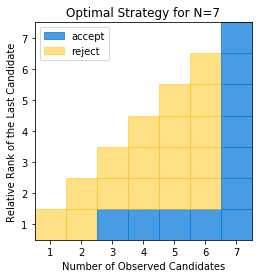

In [26]:
vf.plot_decision_graph(D_r)

In [27]:
#conver CDs:
CD=[(cd[0],cd[1]) for cd in CDs]



D=[[False if np.random.uniform()<1 else True for i in range(j)] for j in range(1,n)]+[[True for i in range(n)]]
for b in range(10):
    for i in range(n-1,-1,-1):
        for j in range(i):
            p_0=sf.evaluate_the_hiring_strategy(n,U,D,CD)

            #try to negate one D[i][rel_ranks[i]-1]
            D[i][j]=not D[i][j]

            p_1=sf.evaluate_the_hiring_strategy(n,U,D,CD)
            print(p_0,p_1)
            if p_0>=p_1:
                D[i][j]=not D[i][j] 

1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0


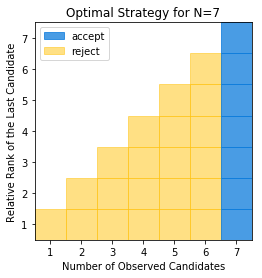

In [28]:
vf.plot_decision_graph(D)

In [29]:
[sf.evaluate_the_hiring_strategy_on_stocks(n,U,Dx,CDs_Test) for Dx in [[[True]],D_r,D]]

5 136.080002 122.660004 [1, 2, 3, 1, 1, 2, 1] [5, 6, 7, 4, 2, 3, 1] [136.080002, 136.699997, 136.960007, 130.0, 128.130005, 128.259995, 122.660004]
5 136.080002 122.660004 [1, 2, 3, 1, 1, 2, 1] [5, 6, 7, 4, 2, 3, 1] [136.080002, 136.699997, 136.960007, 130.0, 128.130005, 128.259995, 122.660004]
5 136.080002 122.660004 [1, 2, 3, 1, 1, 2, 1] [5, 6, 7, 4, 2, 3, 1] [136.080002, 136.699997, 136.960007, 130.0, 128.130005, 128.259995, 122.660004]
5 136.080002 122.660004 [1, 2, 3, 1, 1, 2, 1] [5, 6, 7, 4, 2, 3, 1] [136.080002, 136.699997, 136.960007, 130.0, 128.130005, 128.259995, 122.660004]
5 136.080002 122.660004 [1, 2, 3, 1, 1, 2, 1] [5, 6, 7, 4, 2, 3, 1] [136.080002, 136.699997, 136.960007, 130.0, 128.130005, 128.259995, 122.660004]
5 136.080002 122.660004 [1, 2, 3, 1, 1, 2, 1] [5, 6, 7, 4, 2, 3, 1] [136.080002, 136.699997, 136.960007, 130.0, 128.130005, 128.259995, 122.660004]
5 136.080002 122.660004 [1, 2, 3, 1, 1, 2, 1] [5, 6, 7, 4, 2, 3, 1] [136.080002, 136.699997, 136.960007, 130.0, 

[(0.0, 40824.00060000003, 36798.00120000005, -0.09861844358291472),
 (0.0, 39000.0, 36798.00120000005, -0.0564615076923064),
 (1.0, 36798.00120000005, 36798.00120000005, 0.0)]

In [ ]:
file_name='apple_stock_data'
df=pd.read_csv('data/'+file_name+'.csv',parse_dates=[0,1])
generate_data_from_the_stock_data(10,'2020-02-17',df)

In [ ]:
last_data_date='2020-02-17'
interv=10
dt.strftime(dt.strptime(last_data_date,'%Y-%m-%d')-timedelta(days=interv),'%Y-%m-%d')

In [ ]:
file_name='apple_stock_data'
n,m,interv=10,12,10
last_data_date='2020-05-01'
CDs=dgf.generate_multi_data_from_the_stock_data(n,m,interv,last_data_date,file_name)

In [ ]:
U

In [ ]:

req = requests.get(src_link)
url_content = req.content
csv_file = open('data\\'+company_code+'.csv', 'wb')

csv_file.write(url_content)
csv_file.close()

In [ ]:
import datetime;
ts = datetime.datetime.now().timestamp()
p2,p1=int(ts),int(ts-2*365*24*60*60)
print(p1,p2)

In [ ]:
src_link='https://query1.finance.yahoo.com/v7/finance/download/{}?period1={}&period2={}&interval=1d&events=history'.format(company_code,p1,p2)
src_link

In [98]:
import datetime
import requests
def create_the_source_link(company_code,years):
    ts = datetime.datetime.now().timestamp()
    p2,p1=int(ts),int(ts-years*365*24*60*60)
    return 'https://query1.finance.yahoo.com/v7/finance/download/{}?period1={}&period2={}&interval=1d&events=history'.format(company_code,p1,p2)

def download_data(company_code,years=3):
    src_link=create_the_source_link(company_code,years)
    req = requests.get(src_link)
    url_content = req.content
    csv_file = open('data\\'+company_code+'.csv', 'wb')

    csv_file.write(url_content)
    csv_file.close()

In [145]:
download_data('AB')

In [149]:
#for company_code in ['TGODF','TSLA','BA','FSLY','MAIN','TEAM','WMT','NOW','OKTA','ORCL','RLFTF','SRNE']:
for company_code in ['TWLO','TEAM','MN','MNKD']:
    download_data(company_code)
    for k in [10,20,40,80,160]: 
        try:
            df=pd.read_csv('data\\'+company_code+'.csv')
            L=df.shape[0]
            for i in range(L):
                df.loc[i,'mean']=df.iloc[max(0,i-k):i,1].mean()
                try:
                    df.loc[i,'in_k_days']=df.loc[k+i,'Open']/df.loc[i,'Open']-1
                except:
                    pass
            df['perc2mean']=df['Open']/df['mean']-1
            df_x=df[df.in_k_days.notnull()&df.perc2mean.notnull()]
            X,y=[[x] for x in df_x.perc2mean],[y for y in df_x.in_k_days]
            from sklearn.neighbors import KNeighborsRegressor
            neigh = KNeighborsRegressor(n_neighbors=15)
            neigh.fit(X, y)

            print(company_code,k,neigh.predict([[df.loc[L-1,'perc2mean']]]))
        except:
            pass

TWLO 10 [0.05503283]
TWLO 20 [0.07867074]
TWLO 40 [0.00652785]
TWLO 80 [0.36733082]
TWLO 160 [0.0920732]
TEAM 10 [0.02361301]
TEAM 20 [0.08273431]
TEAM 40 [0.11361043]
TEAM 80 [0.20335343]
TEAM 160 [0.6201245]
MN 10 [-0.01501765]
MN 20 [0.01667266]
MN 40 [-0.07647649]
MN 80 [0.18549319]
MN 160 [0.43353729]
MNKD 10 [-0.04129481]
MNKD 20 [0.0827418]
MNKD 40 [-0.02070346]
MNKD 80 [-0.12133686]
MNKD 160 [-0.15239104]


[0.01164988]


In [115]:
df.loc[L-1,'perc2mean']

0.06635071090047417

In [122]:
X

[[0.014677728142948432],
 [-0.024707000316756322],
 [-0.06898754391568196],
 [-0.06467338316542082],
 [-0.04714868958251017],
 [-0.04557522123893809],
 [-0.04065661385760644],
 [0.01863354037267073],
 [0.007817735090462463],
 [0.2638098426514899],
 [-0.04264035921470932],
 [0.02142007140023816],
 [0.029970591150910275],
 [0.01001148859346812],
 [0.009979128619880262],
 [0.015323808598179056],
 [0.020722891566265167],
 [0.15176582882596246],
 [0.33839330334832596],
 [0.2621271738803952],
 [0.4934756820877817],
 [0.4767685223943072],
 [0.591608170991403],
 [0.5863718455605993],
 [0.3027907291033176],
 [0.26964573952935167],
 [0.14224483255888476],
 [-0.04125519502802477],
 [-0.15080853275903694],
 [-0.09144629930565829],
 [-0.05230544924366687],
 [-0.026965148817094997],
 [-0.009020454834201552],
 [-0.02757646368089839],
 [-0.006247303153668726],
 [-0.01563920024235066],
 [-0.015700367046524555],
 [-0.04462064676616906],
 [-0.09822176343415867],
 [-0.0466740598066111],
 [0.01014032970668

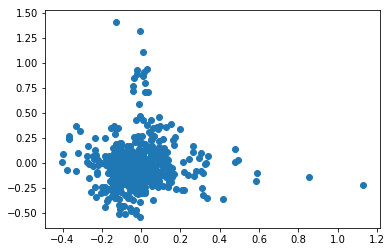

In [107]:
plt.scatter(df.perc2mean,df.in_k_days)

In [50]:
file_name='apple_stock_data'
n,m,interv=10,12,10
last_data_date='2020-03-05'
CDs=dgf.generate_multi_data_from_the_stock_data(n,m,interv,last_data_date,file_name)

In [51]:
CDs[0]

[[1, 1, 1, 1, 2, 1, 1, 6, 4, 8],
 [10, 9, 6, 3, 5, 2, 1, 7, 4, 8],
 [320.3,
  313.05,
  298.18,
  288.08,
  292.65,
  273.52,
  273.36,
  298.81,
  289.32,
  302.74]]

In [4]:
## Learning Part

N=10
k=5
U=cmf.create_payoff_array(N,2,k)
#print(U)
D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
print(E[0][0])

0.24603174603174605


In [6]:
## Create Datasets
def create_a_dataset(Ns):
    X,y=[],[]
    k=3
    for N in Ns:
        U=cmf.create_payoff_array(N,2,k)
        #print(U)
        D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
        for i in range(N-1):
            for j in range(i+1):
                #X.append([(i+1)/N,(j+1)/(i+1),j+1,1/N,N-i])
                X.append([(i+1)/N,(j+1)/(i+1),j+1,N-i,1/N])
                y.append(int(D[i][j]))
                #print(i+1,j+1,1/N,int(D[i][j]))
    return X,y

def build_D_from_y(y):
    D=[]
    i=0
    counter=0
    while counter+i<len(y):
        print(counter,i)
        D.append(y[counter:min(counter+i+1,len(y))])
        counter+=i+1
        i+=1
    D.append([1 for j in range(i+1)])
    return D

In [26]:
X_train, y_train = create_a_dataset(range(5,351,7))
X_test, y_test = create_a_dataset([1000])

In [27]:
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(50, 50, 2), random_state=1)
    
clf= RandomForestClassifier(max_depth=20, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [28]:
y_pred=clf.predict(X_test)

In [29]:
sum(y_pred),sum(y_test),len(y_test),sum([np.abs(y_pred[i]-y_test[i]) for i in range(len(y_pred))])

(925, 925, 499500, 2)

In [237]:
sum([np.abs(y_pred[i]-y_test[i]) for i in range(len(y_pred))])

5

0 0
1 1
3 2
6 3
10 4
15 5
21 6
28 7
36 8
45 9
55 10
66 11
78 12
91 13
105 14
120 15
136 16
153 17
171 18
190 19
210 20
231 21
253 22
276 23
300 24
325 25
351 26
378 27
406 28
435 29
465 30
496 31
528 32
561 33
595 34
630 35
666 36
703 37
741 38
780 39
820 40
861 41
903 42
946 43
990 44
1035 45
1081 46
1128 47
1176 48


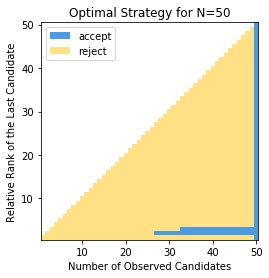

In [238]:
vf.plot_decision_graph(build_D_from_y(y_pred))

0 0
1 1
3 2
6 3
10 4
15 5
21 6
28 7
36 8
45 9
55 10
66 11
78 12
91 13
105 14
120 15
136 16
153 17
171 18
190 19
210 20
231 21
253 22
276 23
300 24
325 25
351 26
378 27
406 28
435 29
465 30
496 31
528 32
561 33
595 34
630 35
666 36
703 37
741 38
780 39
820 40
861 41
903 42
946 43
990 44
1035 45
1081 46
1128 47
1176 48


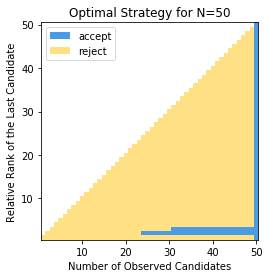

In [239]:
vf.plot_decision_graph(build_D_from_y(y_test))

In [30]:
from scipy.optimize import curve_fit
def func(x, a, b, c, e):
    return a * np.exp(-b * np.asarray(x)) + c+e/x

def func2(x, a,b,c, e):
    return c+e/x+a/x/x+b/x/x/x

popt, pcov = curve_fit(func, xs, ys, bounds=(0, [5., 5., 0.5,5]))
popt

NameError: name 'xs' is not defined

In [78]:
##Try to extend solution to larger Ns for kth best
def intersect_intervals(a,b,epsilon):
    x=max(a[0],b[0])
    y=min(a[1],b[1])
    return (x-epsilon,y+epsilon)

def find_threshold_interval(D,i):
    '''
    D: Decisions
    i: relative rank
    
    Returns:
    a,b: accept if the relative rank is i and after a items observed and before b+1 items observed
    '''
    i-=1
    a=i
    if_alpha_found=False
    for d in D:
        #print(not d[i])
        if len(d)>i:
            if not if_alpha_found:
                if not d[i]:
                    a+=1
                else:
                    if_alpha_found=True
                    b=a
            else:
                if d[i]:
                    b+=1
    return a,b

k=10
alphas=[(0,1) for i in range(k)]
betas=[(0,1) for i in range(k)]
list_a,list_b=[[] for i in range(k)],[[] for i in range(k)]
x=[]
Nx=100
for N in range(4*k,101):
#for N in [10,11,20,21,30,40,50]:
    U=cmf.create_payoff_array(N,3,k)
    #print(U)
    D,E,dyn_hiring_rule=cmf.dynamic_solution_general_form(N,U)
    x.append([1/N])
    x.append([1/N])
    for i in range(k):
        a,b=find_threshold_interval(D,i+1)
        #print((a/N,(a+1)/N),(b/N,(b+1)/N))
        list_a[i].append((a-1)/N)
        list_a[i].append((a+1)/N)
        list_b[i].append((b-1)/N)
        list_b[i].append((b+1)/N)


        alphas[i] = intersect_intervals(alphas[i],((a-1)/N,(a+1)/N),0) 
        betas[i] =  intersect_intervals(betas[i],((b-1)/N,(b+1)/N),0) 


In [68]:
1/np.exp(1)

0.36787944117144233

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
clf=GradientBoostingRegressor(loss="ls")

from sklearn.linear_model import LinearRegression
clf = LinearRegression(fit_intercept=True)
y=list_a[0]

clf.fit(x,y)

LinearRegression()

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
clf=GradientBoostingRegressor(loss="ls")

from sklearn.linear_model import LinearRegression
clf = LinearRegression(fit_intercept=True)
y=list_a[6]

from sklearn.svm import SVC
clf = SVC(kernel='linear')

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

clf.fit([[x[i][0],y[i]] for i in range(len(x))],[i%2 for i in range(len(x))])

LogisticRegression(random_state=0)

In [9]:
x

[[0.1],
 [0.1],
 [0.09090909090909091],
 [0.09090909090909091],
 [0.08333333333333333],
 [0.08333333333333333],
 [0.07692307692307693],
 [0.07692307692307693],
 [0.07142857142857142],
 [0.07142857142857142],
 [0.06666666666666667],
 [0.06666666666666667],
 [0.0625],
 [0.0625],
 [0.058823529411764705],
 [0.058823529411764705],
 [0.05555555555555555],
 [0.05555555555555555],
 [0.05263157894736842],
 [0.05263157894736842],
 [0.05],
 [0.05]]

In [10]:
[[x[i][0],y[i]] for i in range(len(x))],[i%2 for i in range(len(x))]

([[0.1, 0.5],
  [0.1, 0.7],
  [0.09090909090909091, 0.5454545454545454],
  [0.09090909090909091, 0.7272727272727273],
  [0.08333333333333333, 0.5833333333333334],
  [0.08333333333333333, 0.75],
  [0.07692307692307693, 0.6153846153846154],
  [0.07692307692307693, 0.7692307692307693],
  [0.07142857142857142, 0.6428571428571429],
  [0.07142857142857142, 0.7857142857142857],
  [0.06666666666666667, 0.6666666666666666],
  [0.06666666666666667, 0.8],
  [0.0625, 0.6875],
  [0.0625, 0.8125],
  [0.058823529411764705, 0.7058823529411765],
  [0.058823529411764705, 0.8235294117647058],
  [0.05555555555555555, 0.7222222222222222],
  [0.05555555555555555, 0.8333333333333334],
  [0.05263157894736842, 0.6842105263157895],
  [0.05263157894736842, 0.7894736842105263],
  [0.05, 0.7],
  [0.05, 0.8]],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [11]:
y_pred=clf.predict([[x[i][0],y[i]] for i in range(len(x))])
y_act=[i%2 for i in range(len(x))]
sum([np.abs(y_pred[i]-y_act[i]) for i in range(len(x))])

2

In [12]:
w = clf.coef_[0]
a = -w[0] / w[1]
a,(clf.intercept_[0]) / w[1]

(-0.004372147196967553, -0.7114437725941646)

In [13]:
clf.coef_

array([[0.00321946, 0.7363568 ]])

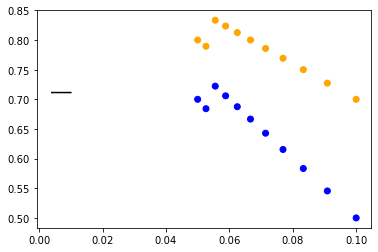

In [14]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0.004, 0.01)
yy = a * xx - (clf.intercept_[0]) / w[1]



# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')

plt.scatter(x,y,color=['blue' if i%2==0 else 'orange' for i in range(len(x))])

In [208]:
['blue' if i%2==0 else 'orange' for i in range(len(x))]

['blue',
 'orange',
 'blue',
 'orange',
 'blue',
 'orange',
 'blue',
 'orange',
 'blue',
 'orange',
 'blue',
 'orange',
 'blue',
 'orange']

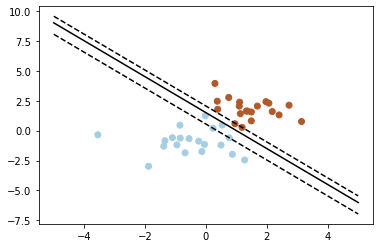

In [273]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [1, 1], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

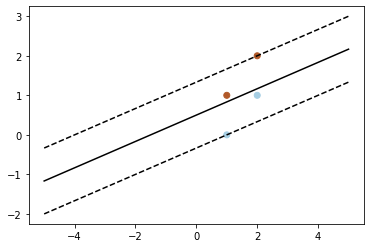

In [281]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.array([[1,0],[1,1],[2,1],[2,2]])
Y = [0,1,0,1]

# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

In [276]:
X=[[1,0],[1,1],[2,1],[2,2]]
Y=[1,0,1,0]

In [18]:
b=clf.predict(np.array([0]).reshape(1, -1))[0]
print(b)
a=clf.predict(np.array([1]).reshape(1, -1))[0]-b
a,b

0.9408179242750656


(-3.286691399079296, 0.9408179242750656)

In [19]:
e=np.exp(1)
2/((2*e**0.5)+(4*e-6*(e)**0.5)**0.5)

0.46644011672213803

In [20]:
1/(e**0.5)

0.6065306597126334

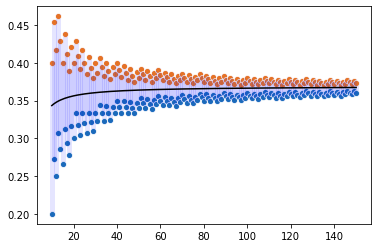

In [50]:
import seaborn as sns

L=int(len(x)/2)
x_0=[1/x[2*i][0] for i in range(L)]
y_l=[y[2*i] for i in range(int(len(x)/2))]
y_u=[y[2*i+1] for i in range(int(len(x)/2))]
y_p=clf.predict(np.array([x[2*i][0] for i in range(L)]).reshape(-1, 1))
#y_p=clf.predict(np.array([[x[2*i][0],x[2*i][1]] for i in range(L)]))
sns.scatterplot(x_0,y_l)
sns.scatterplot(x_0,y_u)

for i in range(len(x_0)):
    #plt.axvline(x_0[i], y_l[i],y_u[i])
    plt.plot([x_0[i], x_0[i]], [y_l[i],y_u[i]],color='blue',alpha=0.1,linewidth=5)
sns.lineplot(x_0,y_p,color='black')

In [331]:

min([y_l[i]-y_u[i] for i in range(len(y_l))])

-0.010000000000000009

In [332]:
x_0

[100.0,
 101.0,
 102.0,
 103.00000000000001,
 104.0,
 104.99999999999999,
 106.0,
 107.00000000000001,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 116.99999999999999,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 122.99999999999999,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140.0,
 141.0,
 142.0,
 143.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.0,
 151.0,
 152.0,
 153.0,
 154.0,
 155.0,
 156.0,
 157.0,
 158.0,
 159.0,
 160.0,
 161.0,
 162.0,
 163.0,
 164.0,
 165.0,
 166.0,
 167.0,
 168.0,
 169.0,
 170.0,
 171.0,
 172.0,
 173.0,
 174.0,
 175.0,
 176.0,
 177.0,
 178.0,
 179.0,
 180.0,
 181.0,
 182.0,
 183.0,
 184.0,
 185.0,
 185.99999999999997,
 187.0,
 188.0,
 189.0,
 190.0,
 191.0,
 192.0,
 193.0,
 194.0,
 195.0,
 196.00000000000003,
 197.00000000000003,
 197.99999999999997,
 199.0,
 200.0,
 201.0,
 202.0,
 203.0,
 204.0,
 205.0,
 206.00000000000003,
 207.0,
 208.0

In [333]:
y_l[-2],y_u[-2]

(0.7844827586206896, 0.7873563218390804)

In [334]:
y_u

[0.79,
 0.7920792079207921,
 0.7941176470588235,
 0.7864077669902912,
 0.7884615384615384,
 0.7904761904761904,
 0.7924528301886793,
 0.794392523364486,
 0.7870370370370371,
 0.7889908256880734,
 0.7909090909090909,
 0.7927927927927928,
 0.7946428571428571,
 0.7876106194690266,
 0.7894736842105263,
 0.7913043478260869,
 0.7931034482758621,
 0.7863247863247863,
 0.788135593220339,
 0.7899159663865546,
 0.7916666666666666,
 0.7933884297520661,
 0.7868852459016393,
 0.7886178861788617,
 0.7903225806451613,
 0.792,
 0.7857142857142857,
 0.7874015748031497,
 0.7890625,
 0.7906976744186046,
 0.7923076923076923,
 0.7862595419847328,
 0.7878787878787878,
 0.7894736842105263,
 0.7910447761194029,
 0.7925925925925926,
 0.7867647058823529,
 0.7883211678832117,
 0.7898550724637681,
 0.7913669064748201,
 0.7857142857142857,
 0.7872340425531915,
 0.7887323943661971,
 0.7902097902097902,
 0.7916666666666666,
 0.7862068965517242,
 0.7876712328767124,
 0.7891156462585034,
 0.7905405405405406,
 0.791946

In [27]:
def line_func(a,b,c,x_0):
    return [a/x**c+b for x in x_0]

def my_error(y_p,y_l,y_u):
    L=len(y_p)
    err=0
    for i in range(L):
        err+=(max(y_l[i]-y_p[i],0)+max(y_p[i]-y_u[i],0))/(y_u[i]-y_l[i])
    return err

In [28]:
my_error(line_func(a,b,1,x_0),y_l,y_u)

1571.5

In [29]:
[[i,j,k] for i in range(-1,2) for j in range(-1,2) for k in range(1,2)]

[[-1, -1, 1],
 [-1, 0, 1],
 [-1, 1, 1],
 [0, -1, 1],
 [0, 0, 1],
 [0, 1, 1],
 [1, -1, 1],
 [1, 0, 1],
 [1, 1, 1]]

In [81]:
for k_ in range(2):
    y=list_a[k_]
    x_0=[1/x[2*i][0] for i in range(int(len(x)/2))]
    y_l=[y[2*i] for i in range(int(len(x)/2))]
    y_u=[y[2*i+1] for i in range(int(len(x)/2))]
    #genetic algorithm 1
    #params=[[i,j,k] for i in range(0,2) for j in range(0,2) for k in range(0,3) for q in range(4)]
    params=[]
    c=1
    for i in [1,2,3,4,5,100,101,102]:
        j=i+np.random.randint(50)+1
        i=i%len(y_l)
        j=j%len(y_l)
        y1,y2=(y_l[i]+y_u[i])/2,(y_l[j]+y_u[j])/2
        x1,x2=1/x_0[i],1/x_0[j]
        a=(y2-y1)/(x2-x1)
        b=y1-a*x1
        params.append([a,b,np.random.uniform(0,2)])
    P=len(params)
    l=len(params[0])

    for i in range(100):
        p1,p2=np.random.randint(P),np.random.randint(P-1)
        p2=(p1+p2+1)%P

        e1=my_error(line_func(*params[p1],x_0),y_l,y_u)
        e2=my_error(line_func(*params[p2],x_0),y_l,y_u)

        u=np.random.uniform(-1,2)
        #print(p1,p2,u)

        new_param=[params[p1][i]*u+params[p2][i]*(1-u) for i in range(l)]
        e_new=my_error(line_func(*new_param,x_0),y_l,y_u)
        #print(i,e1,e2,e_new)

        if e_new<e1 and e1<e2:
            params[p2]=new_param
        elif e_new<e2 and e2<e1:
            params[p1]=new_param

        if e_new==0:
            print(i)
            break
    errors=[my_error(line_func(*p,x_0),y_l,y_u) for p in params]
    min_index=errors.index(min(errors))
    print(k,k_+1,params[min_index],errors[min_index])

0
10 1 [-0.12499999999999957, 0.3125, 0.9844794353965618] 0.0
14
10 2 [-0.5666519586217077, 0.4333480413782976, 2.575329464987946] 0.0


In [355]:
for k_ in range(7,8):
    y=list_a[k_]
    x_0=[1/x[2*i][0] for i in range(L)]
    y_l=[y[2*i] for i in range(int(len(x)/2))]
    y_u=[y[2*i+1] for i in range(int(len(x)/2))]
    #genetic algorithm 2
    params=[]
    c=1
    for i in [1,2,3]:
        j=i+np.random.randint(50)+1
        i=i%len(y_l)
        j=j%len(y_l)
        y1,y2=(y_l[i]+y_u[i])/2,(y_l[j]+y_u[j])/2
        x1,x2=1/x_0[i],1/x_0[j]
        a=(y2-y1)/(x2-x1)
        b=y1-a*x1
        params.append([a,b,np.random.uniform(0,2)])
    errors=[my_error(line_func(*p,x_0),y_l,y_u) for p in params]
    P=len(params)
    l=len(params[0])

    for i in range(50):
        p1,p2=np.random.randint(P),np.random.randint(P-1)
        p2=(p1+p2+1)%P

        e1=my_error(line_func(*params[p1],x_0),y_l,y_u)
        e2=my_error(line_func(*params[p2],x_0),y_l,y_u)

        #u=np.random.uniform(-1,2)
        #print(p1,p2,u)
        min_e,min_param=e1,params[p1]
        for u in [i/400 for i in range(-400,601)]:
            new_param=[params[p1][i]*u+params[p2][i]*(1-u) for i in range(l)]
            e_new=my_error(line_func(*new_param,x_0),y_l,y_u)
            if e_new<min_e:
                min_e,min_param=e_new,new_param
        #print(i,e1,e2,e_new)
        e_new,new_param=min_e,min_param
        if e_new<e1 and e1<e2:
            params[p2]=new_param
        elif e_new<e2 and e2<e1:
            params[p1]=new_param

        if e_new==0:
            print(i)
            break
    errors=[my_error(line_func(*p,x_0),y_l,y_u) for p in params]
    min_index=errors.index(min(errors))
    print(k,k_+1,params[min_index],errors[min_index])

10 8 [0.016958253851937305, 0.8357464093197662, 0.7573539589965284] 0.5119664691935688


In [62]:
params

[[-0.3680007972111272, 0.3689645701039801, 0.8575803961558311],
 [-0.5, 0.37500000000000006, 0.03571927312629053],
 [0.6666666666666675, 0.33333333333333326, 1.9566347184441184],
 [0.333333333333332, 0.33333333333333337, 0.8060571188927501],
 [-0.769230769230768, 0.3846153846153846, 0.8089491713499997],
 [-0.7807313797937718, 0.384531233806387, 0.8152738761734128],
 [40.99999999999994, 4.996003610813204e-16, 1.2771289523416962],
 [-0.999999999999972, 0.3749999999999998, 0.12609058074183532]]

In [347]:
errors=[my_error(line_func(*p,x_0),y_l,y_u) for p in params]
min_index=errors.index(min(errors))
params[min_index],errors[min_index]

([0.08148246470675391, 0.8345631981565237, 0.7570887331771106], 0.0)

In [348]:
1/e

0.36787944117144233

In [61]:
for p in range(P):
    print(p,my_error(line_func(*params[p],x_0),y_l,y_u))
print('Opt',my_error(line_func(*[0,1/e,1],x_0),y_l,y_u))

0 0.0
1 2275.470741351114
2 116.45438712310407
3 74.62676226335526
4 0.7353527672081406
5 0.7101208053935792
6 1328.9411331747617
7 3069.519736523918
Opt 0.0


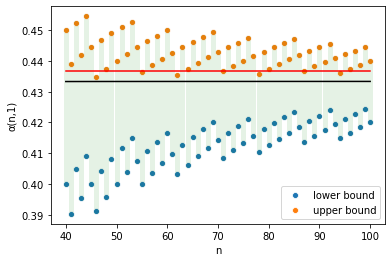

In [86]:
import seaborn as sns
L=int(len(x)/2)
x_0=[1/x[2*i][0] for i in range(L)]
y_l=[y[2*i] for i in range(int(len(x)/2))]
y_u=[y[2*i+1] for i in range(int(len(x)/2))]
y_p=line_func(*params[min_index],x_0)
#y_p=clf.predict(np.array([[x[2*i][0],x[2*i][1]] for i in range(L)]))
sns.scatterplot(x_0,y_l)
sns.scatterplot(x_0,y_u)
plt.legend(['lower bound','upper bound'])
plt.xlabel('n')
plt.ylabel('\u03B1'+'(n,1)')

for i in range(len(x_0)):
    #plt.axvline(x_0[i], y_l[i],y_u[i])
    plt.plot([x_0[i], x_0[i]], [y_l[i],y_u[i]],color='green',alpha=0.1,linewidth=5)

sns.lineplot(x_0,y_p,color='black')
sns.lineplot(x_0,[0.4366 for x in x_0],color='red')

In [64]:
y_l[-1],y_u[-1],y_p[-1],1/e

(0.36444444444444446,
 0.3688888888888889,
 0.36701245365537344,
 0.36787944117144233)

In [418]:
params[13][1]-1/e

2.280881979510596e-06

In [416]:
(b-1/e)/(params[13][1]-1/e)

145.4409736109547